# WandB Training 

### Imports and Initiates for WandB

In [1]:
import wandb
wandb.init(project='DL Assignment 1',entity='ed21s001_cs21m030')

wandb: Currently logged in as: ed21s001_cs21m030 (use `wandb login --relogin` to force relogin)


### Imports

In [2]:
from dataPreparation import PrePareMNISTData
from NeuralNetwork import NeuralNetwork
from Utils import *
from optimizers import *
from train import Trainer

#### Sweep Config
Here Random stratergy has been chosen, which gave almost same output as Grid but worked faster

In [3]:
sweep_config = {
    'method': 'grid',
    'metric':{
        'name':'Val Acc',
        'goal':'maximize'
    }
}

### Config of Hyper Parameters used to get best model 

In [4]:
wandb_config = {    
    'numInputs':{
        'values':[28*28]
    },
    'numHiddenLayers':{
        'values':[4]
    },
    'numHiddenLayersNeuron':{
        'values':[128,256]
    },
    'numOutputOfNeuron':{
        'values':[10]
    },
    'actFun':{
        'values':['ReLU']
    },
    'loss':{
        'values':['CrossEntropyLoss']
    },
    'optimizer':{
        'values':['ADAM','RMSPROP']
    },
    'optimArgs':{
        'values':[
                  {'lr':1e-3,'wd':0.0005},
                 ]
    },
    'xaviers':{
        'values':[False]
    },
    'bs':{
        'values':[128,256]
    },
    'epochs':{
        'values':[10]
    },
}

### WandB Training Function

In [5]:
def wandbTrain(config=None):
    
    with wandb.init(config=config):
        config = wandb.config
        
        (xTrain,yTrain),(xVal,yVal),(xTest,yTest) = PrePareMNISTData(wandbLog=True)
        trainer = Trainer(config)
        trainer.run(xTrain,yTrain,xVal,yVal,wandbLog=True)
        trainer.test(xTest,yTest,wandbLog=True)
        
    return trainer

In [6]:
sweep_config['parameters']=wandb_config
sweep_id = wandb.sweep(sweep_config, project="DL Assignment 1")

Create sweep with ID: do5qi0e8
Sweep URL: https://wandb.ai/ed21s001_cs21m030/DL%20Assignment%201/sweeps/do5qi0e8


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Agent Starting Run: dkc0vabq with config:
wandb: 	actFun: ReLU
wandb: 	bs: 128
wandb: 	epochs: 3
wandb: 	loss: SquaredLoss
wandb: 	numHiddenLayers: 4
wandb: 	numHiddenLayersNeuron: 256
wandb: 	numInputs: 784
wandb: 	numOutputOfNeuron: 10
wandb: 	optimArgs: {'lr': 0.001, 'wd': 0.0005}
wandb: 	optimizer: ADAM
wandb: 	xaviers: False


  3%|██                                                                               | 11/424 [00:02<01:48,  3.81it/s]C:\Users\Kush\PycharmProjects\CS6910_DeepLearning\Assn_1\Utils.py:10: RuntimeWarning: overflow encountered in exp
  exp = np.exp(x)
C:\Users\Kush\PycharmProjects\CS6910_DeepLearning\Assn_1\Utils.py:11: RuntimeWarning: invalid value encountered in true_divide
  return exp / np.sum(exp,axis=1).reshape(-1,1)

 30%|████████████████████████▏                                                       | 128/424 [00:30<01:17,  3.81it/s]


 61%|█████████████████████████████████████████████████                               | 260/424 [01:02<00:37,  4.32it/s]


 92%|█████████████████████████████████████████████████████████████████████████▉      | 392/424 [01:47<00:13,  2.40it/s]


 23%|██████████████████▋                                                              | 98/424 [00:30<01:38,  3.31it/s]


 54%|███████████████████████████████████████████▍                                    | 230/424 [01:11<01:05,  2.97it/s]


 85%|████████████████████████████████████████████████████████████████████▎           | 362/424 [01:46<00:15,  3.95it/s]


 16%|████████████▉                                                                    | 68/424 [00:18<01:50,  3.22it/s]


 47%|█████████████████████████████████████▋                                          | 200/424 [00:54<00:58,  3.84it/s]


 78%|██████████████████████████████████████████████████████████████▋                 | 332/424 [01:27<00:21,  4.19it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [05:53<00:00, 117.79s/it]
C:\Users\Kush\PycharmProjects\CS6910_DeepLearning\Assn_1\plotCM.py:17: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm/np.sum(cm,axis=1)
C:\Users\Kush\PycharmProjects\CS6910_DeepLearning\Assn_1\plotCM.py:17: RuntimeWarning: invalid value encountered in true_divide
  cm = cm/np.sum(cm,axis=1)


Test Acc,▁
Train Acc,█▁▂
Train Loss,
Val Acc,▁▁▁
Val Loss,
epoch,▁▅█
Test Acc,0.1
Train Acc,0.09986
Train Loss,nan
Val Acc,0.10433
Val Loss,nan


wandb: Agent Starting Run: l98cszpq with config:
wandb: 	actFun: ReLU
wandb: 	bs: 128
wandb: 	epochs: 3
wandb: 	loss: SquaredLoss
wandb: 	numHiddenLayers: 4
wandb: 	numHiddenLayersNeuron: 256
wandb: 	numInputs: 784
wandb: 	numOutputOfNeuron: 10
wandb: 	optimArgs: {'lr': 0.001, 'wd': 0.0005}
wandb: 	optimizer: RMSPROP
wandb: 	xaviers: False


 31%|████████████████████████▌                                                       | 130/424 [00:33<01:27,  3.36it/s]


 62%|█████████████████████████████████████████████████▍                              | 262/424 [01:10<00:37,  4.29it/s]


 93%|██████████████████████████████████████████████████████████████████████████▎     | 394/424 [01:44<00:07,  4.15it/s]


 24%|██████████████████▊                                                             | 100/424 [00:26<01:26,  3.73it/s]


 55%|███████████████████████████████████████████▊                                    | 232/424 [01:03<00:57,  3.35it/s]


 86%|████████████████████████████████████████████████████████████████████▋           | 364/424 [01:43<00:15,  3.78it/s]


 17%|█████████████▎                                                                   | 70/424 [00:17<01:30,  3.93it/s]


 48%|██████████████████████████████████████                                          | 202/424 [00:53<01:01,  3.61it/s]


 79%|███████████████████████████████████████████████████████████████                 | 334/424 [01:31<00:28,  3.20it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [05:49<00:00, 116.66s/it]


Test Acc,▁
Train Acc,█▁▁
Train Loss,
Val Acc,▁▁▁
Val Loss,
epoch,▁▅█
Test Acc,0.1
Train Acc,0.10057
Train Loss,nan
Val Acc,0.09733
Val Loss,nan


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


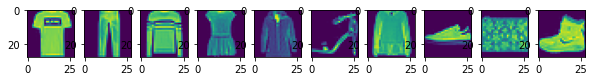

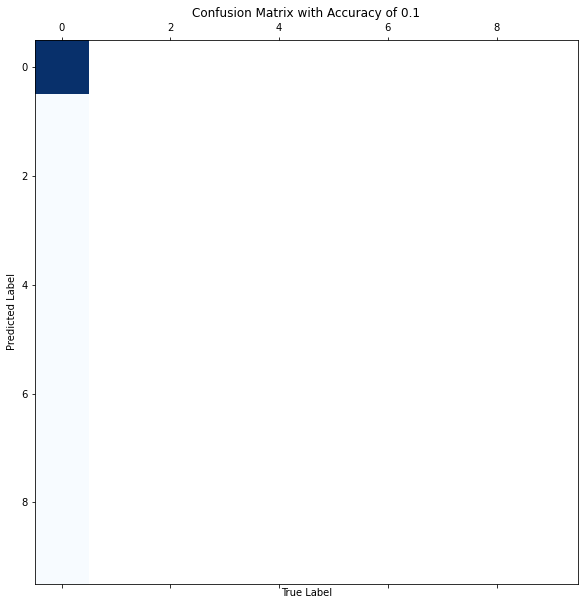

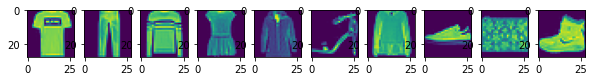

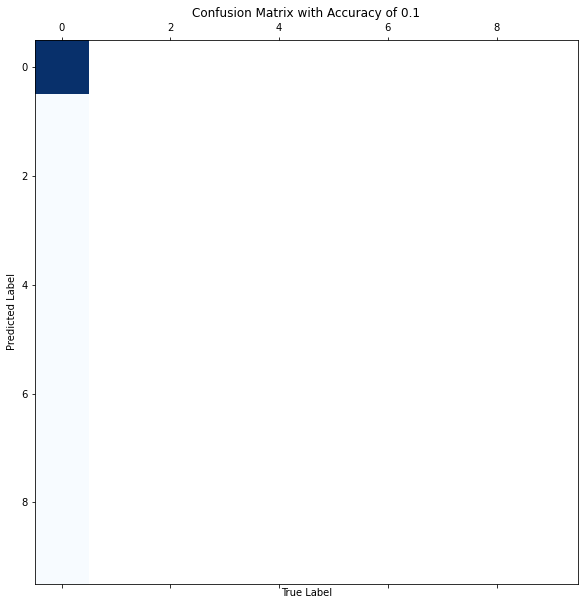

In [7]:
wandb.agent(sweep_id, wandbTrain)